## Context

By predicting customer satisfaction, companies can improve the quality of products and services, keep customers satisfied, and achieve competitive advantage in the marketplace. This leads to greater customer loyalty, business growth and long-term success.

In addition, predicting customer satisfaction also allows companies to act proactively in relation to possible problems or dissatisfaction, avoiding complaints or negative reviews. By anticipating customer needs and expectations, companies can implement corrective or preventive measures, offer customized solutions and solve problems before they become more complex. This helps build a positive reputation and strengthen customer relationships, resulting in a more loyal and satisfied customer base.

### Description of variables
**realSum**	The total price of the Airbnb listing. (Numeric)

**room_type**	The type of room offered (e.g. private room, shared room, entire home/apt). (Categorical)

**room_shared**	Whether the room is shared or not. (Boolean)

**room_private**	Whether the room is private or not. (Boolean)

**person_capacity**	The maximum number of people that can be accommodated in a single listing. (Numeric)

**host_is_superhost**	Whether or not a particular host is identified as a superhost on Airbnb. (Boolean)

**multi**	Whether multiple rooms are provided in one individual listing or not. (Boolean)

**biz**	Whether a particular listing offers business facilities like meeting area/conference rooms in addition to accommodation options. (Boolean)

**cleanliness_rating**	The rating associated with how clean an individual property was after guests stayed at it. (Numeric)

**guest_satisfaction_overall**	The overall rating which shows how satisfied are guests with their stay after visiting an Airbnb property. (Numeric)

**bedrooms**	The total quantity of bedrooms available among all properties against a single hosting id. (Numeric)

**dist**	Distance from city centre associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )

**metro_dist**	Distance from metro station associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )

**lng**	Longitude measurement corresponding to each rental unit. (Numeric)

**lat**	Latitude measurement corresponding to each rental unit. (Numeric)

In [1]:
# Loading fuctions and libraries

# Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and pre processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

# Obtendo a lista de arquivos no diretório
diretorio = '/kaggle/input/airbnb-price-determinants-in-europe'
arquivos = os.listdir(diretorio)

# Criando uma lista para armazenar os DataFrames de cada arquivo
dfs = []

# Loop para ler e armazenar cada arquivo em um DataFrame
for arquivo in arquivos:
    caminho_arquivo = os.path.join(diretorio, arquivo)
    df = pd.read_csv(caminho_arquivo)
    dfs.append(df)

# Combinando os DataFrames em um único DataFrame
dataset = pd.concat(dfs, ignore_index=True)


In [3]:
# Displaying the five first rows
dataset.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,536.396682,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,390.776775,19.001549,1030.738507,47.550371,2.35900,48.86800
1,1,290.101594,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,518.478270,25.211044,1218.658866,56.219575,2.35385,48.86282
2,2,445.754497,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,432.689942,21.039580,1069.894793,49.356741,2.36023,48.86375
3,3,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,444.555284,21.616533,902.856370,41.650870,2.31714,48.87475
4,4,266.334234,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,1013.458689,49.279502,1348.063511,62.189313,2.33408,48.85384


In [4]:
# Informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [5]:
# Checking for null values 
dataset.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [6]:
# Checking the rows duplicated
dataset.duplicated().sum()

0

In [7]:
# Dropping some columns that we won't use
dataset.drop(['Unnamed: 0', 'lng', 'lat', 'attr_index',
             'attr_index_norm', 'rest_index', 'rest_index_norm'], axis= 1, inplace= True)

## Exploratory Data Analysis - Categoricals Variables

In [8]:
# Extracting the categorical variables
var_cats = dataset[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].astype('object')

# Displaying the datas
var_cats.head(5)

,room_type,room_shared,room_private,host_is_superhost,multi,biz
0,Entire home/apt,False,False,False,0,1
1,Private room,False,True,True,0,0
2,Entire home/apt,False,False,False,0,1
3,Private room,False,True,False,0,0
4,Entire home/apt,False,False,True,0,0


In [9]:
# Describing categorical variables
var_cats.describe().transpose()

,count,unique,top,freq
room_type,51707,3,Entire home/apt,32648
room_shared,51707,2,False,51341
room_private,51707,2,False,33014
host_is_superhost,51707,2,False,38475
multi,51707,2,0,36642
biz,51707,2,0,33599


> The informations "count", "unique", "top" and "freq" are describe statistics the provide information about a distribution of values in a certain variable
>
> **room_type:** There are 51707 records in the column "room_type". There are 3 unique values: "Entire home/apt", "Private room" e "Shared room". The values the most frequent is "Entire home/apt" with 32648 occurrences.
>
> **room_shared:** There are 51707 records in the column "room_shared". There are 2 unique values: False and True. The value the most frequent is False with 51341O occurrences
>
> **room_private:** There are 51707 records in the column "room_shared". There are 2 unique values: False and True. The value the most frequent is False with 33014 occurrences
>
> **host_is_superhost:** There are 51707 records in the column "host_is_superhost". There are 2 unique values: False and True. The value the most frequent is False with 38475 occurrences.
>
> **multi:** There are 51707 records in the column "multi". There are 2 unique values: 0 e 1. The value the most frequent is 0 with 36642 occurrences.
>
> **biz:** There are 51707 records in the column "biz". There are 2 dunique values: 0 e 1. The value the most frequent is 0 with 33599 occurrences.

## Variable: room_type

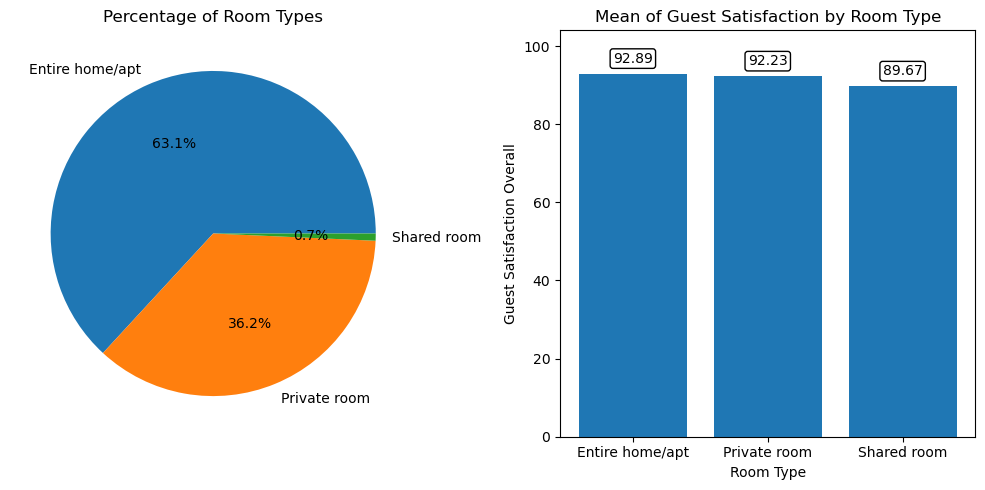

In [10]:
# Grouping the data by room_type and calculating the average guest_satisfaction_overall
room_type_satisfaction = dataset.groupby('room_type')['guest_satisfaction_overall'].mean().reset_index()

# Creating the bar plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart
room_type_counts = var_cats.room_type.value_counts()
axes[0].pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Types')

# Bar plot
axes[1].bar(room_type_satisfaction['room_type'], room_type_satisfaction['guest_satisfaction_overall'])
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Guest Satisfaction Overall')
axes[1].set_title('Mean of Guest Satisfaction by Room Type')
axes[1].set_ylim(top=max(room_type_satisfaction['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


# Adjusting the layout
plt.tight_layout()

# Displaying the charts
plt.show()

> Based on the informations provided, we can extract certain conclusions:
>
> - The satisfation of customers is generally high to all of types of rooms. The avegered of satisfation of customers to the "Entire home/apart" and "Private room" are above 90, while the avereged of "Shared room" is a little smaller, around 89.
> - The customer seems to be more satisfied when rent a Entire room/apart compared with Private room or Shared room. This suggest that to have a exclusive space can influence positively the experience of customer.
>
> - While the difference in customer satisfaction between private and shared rooms is small, customers tend to rate private rooms slightly higher.


## Variable: room_shared

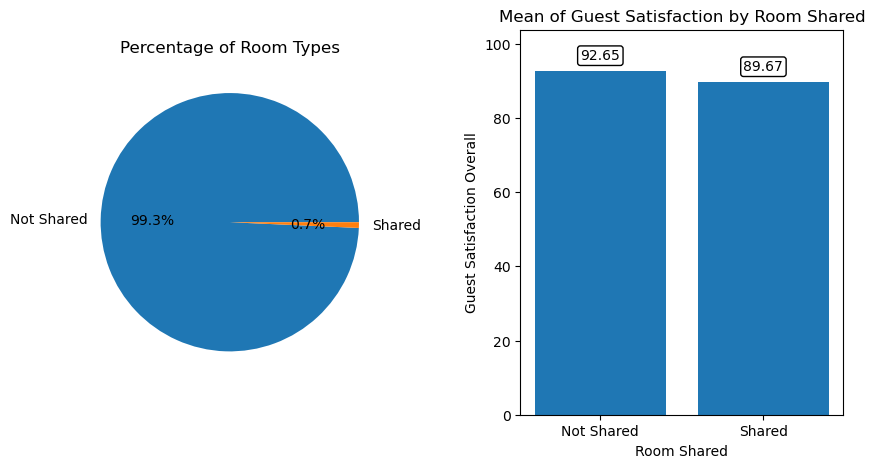

In [11]:
# Grouping the data by room_type and calculating the average guest_satisfaction_overall
room_shared_satisfaction = dataset.groupby('room_shared')['guest_satisfaction_overall'].mean().reset_index()

# Convertendo os valores da coluna 'room_shared' em strings
room_shared_satisfaction['room_shared'] = room_shared_satisfaction['room_shared'].replace({False: 'Not Shared', True: 'Shared'})

# Creating the bar plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4})

# Pie chart
# Pie chart
room_shared_counts = var_cats.room_shared.replace({False: 'Not Shared', True: 'Shared'}).value_counts()
axes[0].pie(room_shared_counts, labels=room_shared_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Types')


# Bar plot
axes[1].bar(room_shared_satisfaction['room_shared'], room_shared_satisfaction['guest_satisfaction_overall'])

axes[1].set_xlabel('Room Shared')
axes[1].set_ylabel('Guest Satisfaction Overall')
axes[1].set_title('Mean of Guest Satisfaction by Room Shared')
axes[1].set_ylim(top=max(room_shared_satisfaction['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

# Displaying the charts
plt.show()


we can analyze the relationship between the variable "room_shared" and the variable "guest_satisfaction_overall".

> - "Non-Shared" rooms have an overall guest satisfaction average of 92.65.
> - "Shared" rooms have an overall guest satisfaction average of 89.67.

From this analysis, it appears that guests tend to have a higher satisfaction level in "Non-Shared" rooms compared to "Shared" rooms. This suggests that having a private room (not shared with other guests) can positively impact overall guest satisfaction.

## Variable: room_private

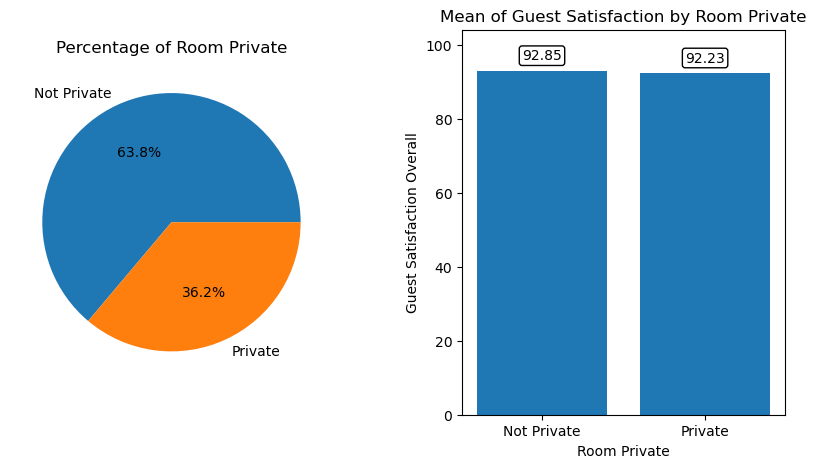

In [12]:
# Grouping the data by room_type and calculating the average guest_satisfaction_overall
room_private_satisfation = dataset.groupby('room_private')['guest_satisfaction_overall'].mean().reset_index()

# Convertendo os valores da coluna 'room_shared' em strings
room_private_satisfation['room_private'] = room_private_satisfation['room_private'].replace({False: 'Not Private', True: 'Private'})

# Creating the bar plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4})

# Pie chart
# Pie chart
room_private_counts = var_cats.room_private.replace({False: 'Not Private', True: 'Private'}).value_counts()
axes[0].pie(room_private_counts, labels=room_private_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Private')


# Bar plot
axes[1].bar(room_private_satisfation['room_private'], room_private_satisfation['guest_satisfaction_overall'])

axes[1].set_xlabel('Room Private')
axes[1].set_ylabel('Guest Satisfaction Overall')
axes[1].set_title('Mean of Guest Satisfaction by Room Private')
axes[1].set_ylim(top=max(room_private_satisfation['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

# Displaying the charts
plt.show()


Based on the provided data, we can analyze the relationship between the "room_private" variable and the "guest_satisfaction_overall" variable.

> - "Not Private" rooms have an average guest satisfaction overall of 92.85.
> - "Private" rooms have an average guest satisfaction overall of 92.23.

From this analysis, we observe that there is no significant difference in the overall guest satisfaction between "Not Private" and "Private" rooms. Both types of rooms have a similar average guest satisfaction overall. This suggests that whether a room is private or not may not have a direct impact on the overall guest satisfaction.

## Variable: host_is_superhost

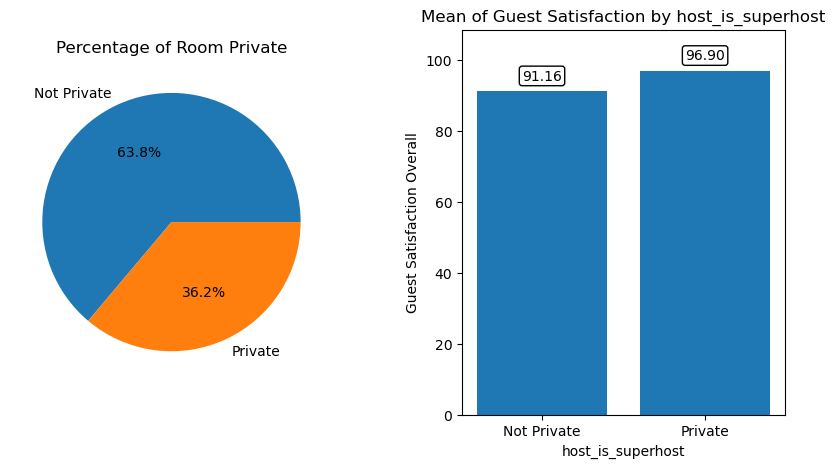

In [13]:
# Grouping the data by room_type and calculating the average guest_satisfaction_overall
room_private_superhost = dataset.groupby('host_is_superhost')['guest_satisfaction_overall'].mean().reset_index()

# Convertendo os valores da coluna 'room_shared' em strings
room_private_superhost['host_is_superhost'] = room_private_superhost['host_is_superhost'].replace({False: 'Not Private', True: 'Private'})

# Creating the bar plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4})

# Pie chart
# Pie chart
room_superhost_counts = var_cats.host_is_superhost.replace({False: 'Not Private', True: 'Private'}).value_counts()
axes[0].pie(room_private_counts, labels=room_private_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Private')


# Bar plot
axes[1].bar(room_private_superhost['host_is_superhost'], room_private_superhost['guest_satisfaction_overall'])

axes[1].set_xlabel('host_is_superhost')
axes[1].set_ylabel('Guest Satisfaction Overall')
axes[1].set_title('Mean of Guest Satisfaction by host_is_superhost')
axes[1].set_ylim(top=max(room_private_superhost['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

# Displaying the charts
plt.show()


we can analyze the relationship between the "host_is_superhost" variable and the "guest_satisfaction_overall" variable.

> - "Not Superhost" hosts have an average guest satisfaction overall of 91.159038.
> - "Superhost" hosts have an average guest satisfaction overall of 96.900242.

From this analysis, we can observe that there is a noticeable difference in the overall guest satisfaction between "Not Superhost" hosts and "Superhost" hosts. "Superhost" hosts tend to have a significantly higher average guest satisfaction overall compared to "Not Superhost" hosts. This indicates that being a "Superhost" may positively impact the overall guest satisfaction, suggesting that guests have a higher level of satisfaction when staying with "Superhost" hosts.

## Exploratory Data Analysis - Numerics Variables

In this exploratory data anaysis, we can analise a couple variables

In [14]:
# Extracting only numeric variables
var_num = dataset.select_dtypes(include = ['int64', 'float64'])

In [15]:
var_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
realSum,51707.0,279.88,327.95,34.78,148.75,211.34,319.69,18545.45
person_capacity,51707.0,3.16,1.30,2.00,2.00,3.00,4.00,6.00
multi,51707.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
biz,51707.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
cleanliness_rating,51707.0,9.39,0.95,2.00,9.00,10.00,10.00,10.00
guest_satisfaction_overall,51707.0,92.63,8.95,20.00,90.00,95.00,99.00,100.00
bedrooms,51707.0,1.16,0.63,0.00,1.00,1.00,1.00,10.00
dist,51707.0,3.19,2.39,0.02,1.45,2.61,4.26,25.28
metro_dist,51707.0,0.68,0.86,0.00,0.25,0.41,0.74,14.27


## Variable: person_capacity

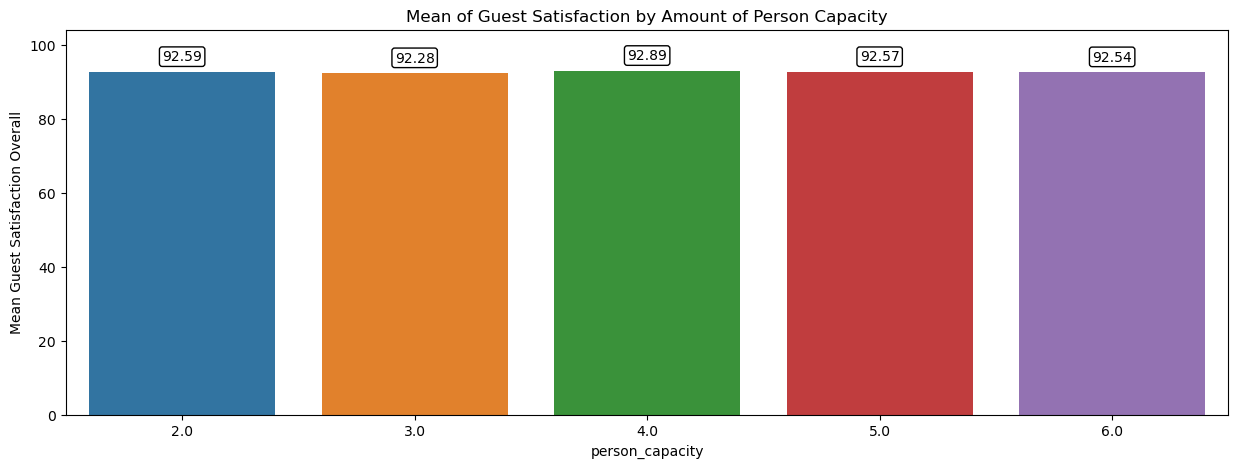

In [16]:
person_capacity_satisfaction = dataset.groupby('person_capacity')['guest_satisfaction_overall'].mean().reset_index()
person_capacity_satisfaction


plt.subplots(figsize=(15, 5))

# Bar plt
ax = sns.barplot(x = 'person_capacity', y = 'guest_satisfaction_overall', 
            data = person_capacity_satisfaction)

ax.set_xlabel('person_capacity')
ax.set_ylabel('Mean Guest Satisfaction Overall')
ax.set_title('Mean of Guest Satisfaction by Amount of Person Capacity')
ax.set_ylim(top=max(person_capacity_satisfaction['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


# Displaying the plot
plt.show()


> From this analysis, we can see that there is no significant difference in overall guest satisfaction based on the accommodation's capacity. The average values of general satisfaction are similar for all the people skills mentioned. This indicates that people capacity does not seem to be a determining factor in overall guest satisfaction. Other aspects of housing may have a greater influence on this aspect.

## Variable: cleanliness_rating

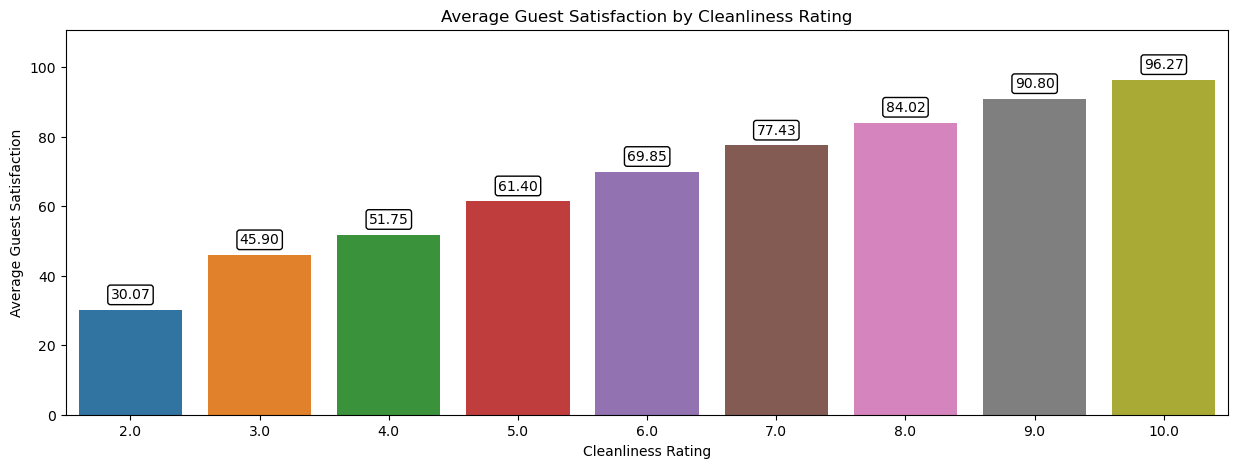

In [17]:
# Grouping the data by cleanliness_rating and calculating the average score
cleanliness_score_mean = dataset.groupby('cleanliness_rating')['guest_satisfaction_overall'].mean().reset_index()


plt.subplots(figsize=(15, 5))

# Creating the bar plot
ax = sns.barplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=cleanliness_score_mean)

# Adding labels and title
ax.set_xlabel('Cleanliness Rating')
ax.set_ylabel('Average Guest Satisfaction')
ax.set_title('Average Guest Satisfaction by Cleanliness Rating')

# Adding the average values above each bar in a white box with black border
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
ax.set_ylim(top=max(cleanliness_score_mean['guest_satisfaction_overall']) * 1.15)

# Displaying the plot
plt.show()



> Based on the analysis of cleanliness rating and overall guest satisfaction, we can observe a positive correlation between these two variables. As the cleanliness rating increases, the overall guest satisfaction also tends to increase. This suggests that cleanliness plays a significant role in determining the satisfaction of guests. Accommodations with higher cleanliness ratings tend to have higher levels of guest satisfaction.

## Variable: bedrooms

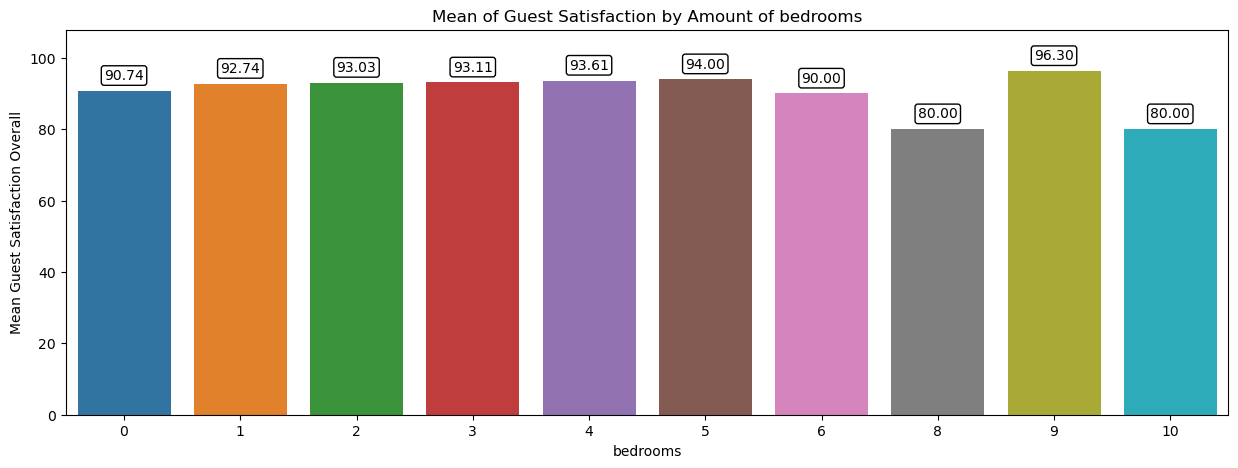

In [18]:
bedrooms_satisfaction = dataset.groupby('bedrooms')['guest_satisfaction_overall'].mean().reset_index()

plt.subplots(figsize=(15, 5))

# Bar plt
ax = sns.barplot(x = 'bedrooms', y = 'guest_satisfaction_overall', 
            data = bedrooms_satisfaction)

ax.set_xlabel('bedrooms')
ax.set_ylabel('Mean Guest Satisfaction Overall')
ax.set_title('Mean of Guest Satisfaction by Amount of bedrooms')
ax.set_ylim(top=max(bedrooms_satisfaction['guest_satisfaction_overall']) * 1.12)

# Adding the average values above each bar in a white box with black border
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                     va='center', xytext=(0, 11), textcoords='offset points',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


# Displaying the plot
plt.show()


> From the analysis of the number of bedrooms and overall guest satisfaction, we can observe that there is a general trend of increasing guest satisfaction with an increasing number of bedrooms. Accommodations with a higher number of bedrooms tend to have higher overall guest satisfaction scores. However, it is important to note that there are a few exceptions in the data, such as accommodations with 6, 8, and 10 bedrooms, which have lower guest satisfaction scores. These exceptions may be attributed to other factors influencing guest satisfaction, such as the overall condition of the accommodation, amenities, or location.

## Variable: Dist

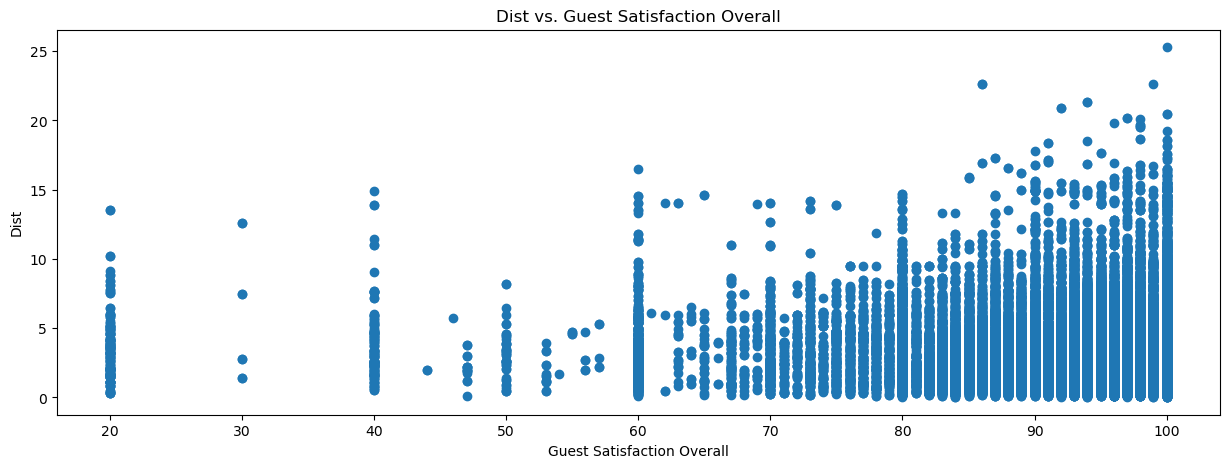

In [19]:
plt.subplots(figsize=(15, 5))

# Creating a scatter plot
plt.scatter(dataset['guest_satisfaction_overall'], dataset['dist'])

# Adding labels and title
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Dist')
plt.title('Dist vs. Guest Satisfaction Overall')

# Displaying the plot
plt.show()


> Based on the graph showing the distance from the city center associated with each rented property versus customer satisfaction, it appears that there is a trend indicating that the further away the property is from the city center, the lower the customer satisfaction tends to be. This suggests that proximity to the city center may have an impact on customer satisfaction.
>
> On the other hand, properties located farther away may require more travel time and effort to reach the city center, potentially leading to lower satisfaction. 

## Variable: metro_dist

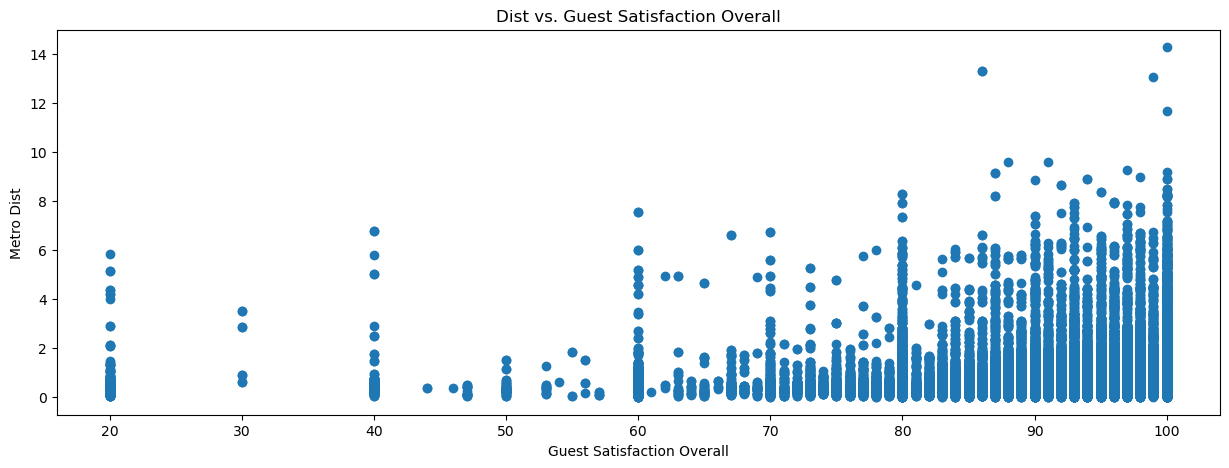

In [20]:
plt.subplots(figsize=(15, 5))

# Creating a scatter plot
plt.scatter(dataset['guest_satisfaction_overall'], dataset['metro_dist'])

# Adding labels and title
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Metro Dist')
plt.title('Dist vs. Guest Satisfaction Overall')

# Displaying the plot
plt.show()


> Based on the graph showing the distance from the metro station associated with each rented property versus customer satisfaction, it appears that there is a trend suggesting that the closer the property is to a metro station, the higher the customer satisfaction tends to be. This indicates that proximity to a metro station may play a role in enhancing customer satisfaction.

## Correlation matrix

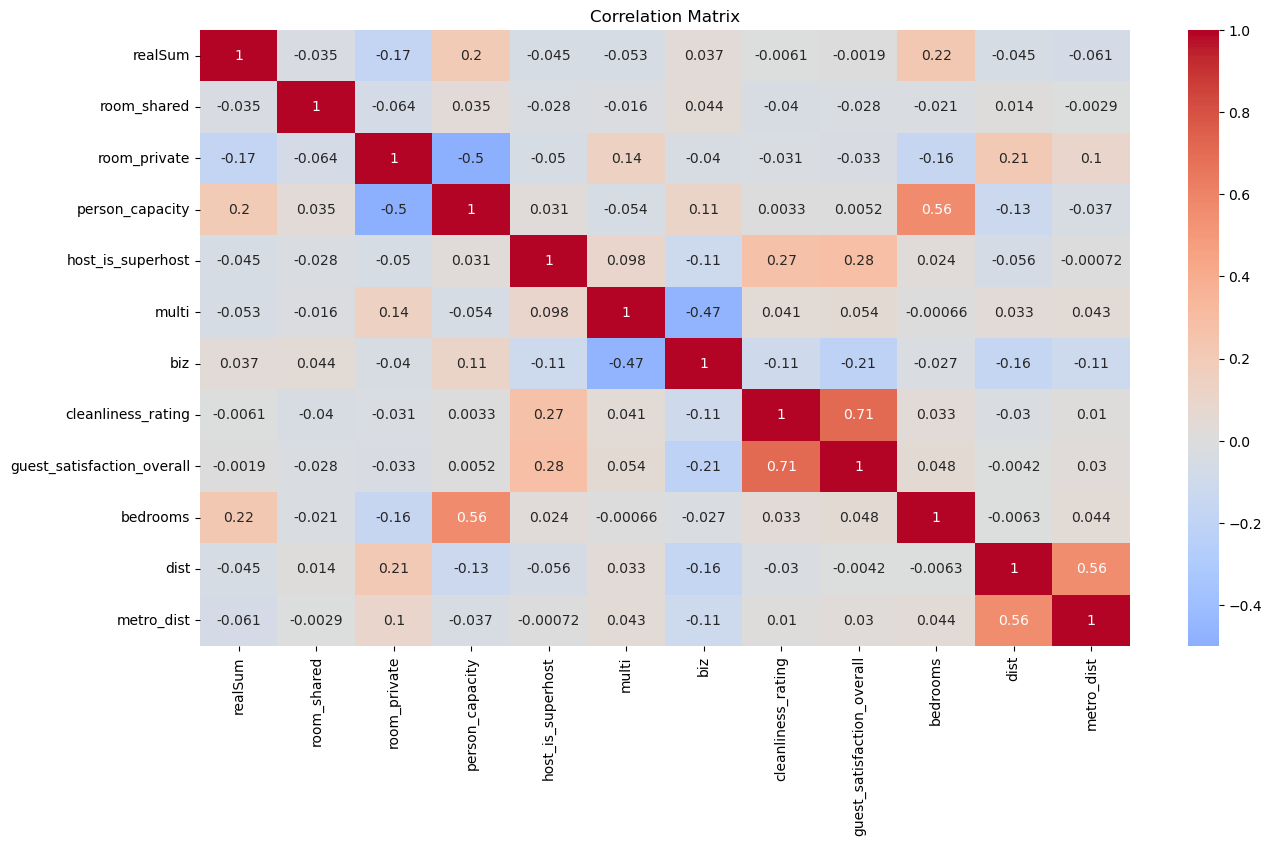

In [21]:
# Correlation matrix Pearson
correlation_matrix = dataset.corr(method = 'pearson')

# Adjusting the figure size
plt.figure(figsize=(15, 8))

# Plotting the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Getting correlations with respect to the 'guest_satisfaction_overall' variable
correlations = correlation_matrix['guest_satisfaction_overall'].drop('guest_satisfaction_overall')
correlations = correlations.abs().sort_values(ascending=False)

# Displaying variables sorted by correlation
print(correlations)

cleanliness_rating    0.714045
host_is_superhost     0.280062
biz                   0.208160
multi                 0.054254
bedrooms              0.047573
room_private          0.033401
metro_dist            0.029788
room_shared           0.027876
person_capacity       0.005181
dist                  0.004178
realSum               0.001888
Name: guest_satisfaction_overall, dtype: float64


> Based on the presented correlations, the variable "dist", "person_capacity" and "realSum" are the ones that have correlations closest to zero. Therefore, these two variables could be considered for exclusion in a regression model, as their relationship with the variable of interest (guest_satisfaction_overall) is very weak.

In [23]:
# Dropping some columns that we won't use
dataset.drop(['realSum', 'dist'], axis= 1, inplace= True)

### Applying Label Encoding

In [24]:
# Displaying the unique values 
unique_room_type = [value for value in dataset['room_type'].unique()]
unique_room_shared = [value for value in dataset['room_shared'].unique()]
unique_room_private = [value for value in dataset['room_private'].unique()]
unique_host_is_superhost = [value for value in dataset['host_is_superhost'].unique()]

print("Unique values of 'room_type':", unique_room_type)
print("Unique values of 'room_shared':", unique_room_shared)
print("Unique values of 'room_private':", unique_room_private)
print("Unique values of 'host_is_superhost':", unique_host_is_superhost)

Unique values of 'room_type': ['Entire home/apt', 'Private room', 'Shared room']
Unique values of 'room_shared': [False, True]
Unique values of 'room_private': [False, True]
Unique values of 'host_is_superhost': [False, True]


In [25]:
# Creating of instance of Label Encoding
encoder = LabelEncoder()

# Applying the Label Encoding in to de categoric variables
dataset.host_is_superhost = encoder.fit_transform(dataset['host_is_superhost'])
dataset.room_type = encoder.fit_transform(dataset['room_type'])
dataset.room_shared = encoder.fit_transform(dataset['room_shared'])
dataset.room_private = encoder.fit_transform(dataset['room_private'])

In [26]:
# Displaying the final dataset
dataset.head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
0,0,0,0,5.0,0,0,1,9.0,89.0,1,0.212346
1,1,0,1,2.0,1,0,0,10.0,97.0,1,0.193710
2,0,0,0,4.0,0,0,1,10.0,100.0,1,0.294343
3,1,0,1,2.0,0,0,0,10.0,94.0,1,0.234740
4,0,0,0,2.0,1,0,0,9.0,88.0,1,0.055052


## Applying Data Normalization


In [27]:
# Splitting the input and output data

# Input data
X = dataset.drop('guest_satisfaction_overall', axis=1)  

# Output data (only guest_satisfaction_overall)
y = dataset['guest_satisfaction_overall']  

# Splitting dataset in training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3)

In [28]:
# Displaying the shape of training data 
print("Shape of input:")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print('===========================')
# Displaying the shape of testing data
print("Shape of output:")
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of input:
Shape of X_train: (36194, 10)
Shape of y_train: (36194,)
Shape of output:
Shape of X_test: (15513, 10)
Shape of y_test: (15513,)


## Normalizing the data

In [29]:
# Creating the object StandardScaler
scaler = StandardScaler()

# Applying the normalization into training data
X_train_norm = scaler.fit_transform(X_train)

# Applying the normalization into testing data
X_test_norm = scaler.transform(X_test)

## Multiple Linear Regression

In [30]:
# Create the linear regression object
model_v1 = LinearRegression()

# Training the linear regression model
model_v1.fit(X_train_norm, y_train)

# Making predictions
y_pred = model_v1.predict(X_test_norm)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating the coefficient of determination (R²)
r2 = r2_score(y_test, y_pred)

# Creating the dictionary with the metrics
metrics_LinearRegression = {'Model': ['LinearRegression'], 
                            'MSE': [mse], 
                            'MAE': [mae], 
                            'R²': [r2]}

# Creating a dataframe
df_metrics_LinearRegression = pd.DataFrame(metrics_LinearRegression)

# Displaying o DataFrame
display(df_metrics_LinearRegression)

,Model,MSE,MAE,R²
0,LinearRegression,37.023495,3.897565,0.552522


## K-Nearest Neighbors (KNN)

In [31]:
# Create the KNeighborsRegressor object
model_KNN = KNeighborsRegressor()

# Training the model
model_KNN.fit(X_train_norm, y_train)

# Making predictions
predictions = model_KNN.predict(X_test_norm)

# Calculating the Mean Squared Error (MSE)
mse_KNN = mean_squared_error(y_test, predictions)

# Calculating the mean absolute error (MAE)
mae_KNN = mean_absolute_error(y_test, predictions)

# Calculating the coefficient of determination (R²)
r2_KNN = model_KNN.score(X_test_norm, y_test)

# Creating the dictionary with the metrics
metrics_KNN = {'Model': ['KNN'], 
               'MSE': [mse_KNN], 
               'MAE': [mae_KNN], 
               'R²': [r2_KNN]}

# Creating a dataframe
metrics_KNN = pd.DataFrame(metrics_KNN)

# Displaying o DataFrame
display(metrics_KNN)

,Model,MSE,MAE,R²
0,KNN,37.731652,3.930845,0.543963


## DecisionTreeRegressor

In [32]:
# Create the DecisionTreeRegressor object
model_DTR = DecisionTreeRegressor()

# Training the model
model_DTR.fit(X_train_norm, y_train)

# Making predictions
predictions = model_DTR.predict(X_test_norm)

# Calculating the Mean Squared Error (MSE)
mse_DTR = mean_squared_error(y_test, predictions)

# Calculating the mean absolute error (MAE)
mae_DTR = mean_absolute_error(y_test, predictions)

# Calculating the coefficient of determination (R²)
r2_DTR = r2_score(y_test, predictions)

# Creating the dictionary with the metrics
metrics_DecisionTreeRegressor = {'Model': ['DecisionTreeRegressor'], 
                                 'MSE': [mse_DTR], 
                                 'MAE': [mae_DTR], 
                                 'R²': [r2_DTR]}

# Creating a dataframe
metrics_DecisionTreeRegressor = pd.DataFrame(metrics_DecisionTreeRegressor)

# Displaying o DataFrame
display(metrics_DecisionTreeRegressor)

,Model,MSE,MAE,R²
0,DecisionTreeRegressor,32.485738,2.540869,0.607367


In [33]:
# Join the dataframes
combined_metrics = pd.concat([metrics_DecisionTreeRegressor, metrics_KNN, df_metrics_LinearRegression])
combined_metrics

,Model,MSE,MAE,R²
0,DecisionTreeRegressor,32.485738,2.540869,0.607367
0,KNN,37.731652,3.930845,0.543963
0,LinearRegression,37.023495,3.897565,0.552522


## Predictions with Test Data

In [34]:
# Making predictions on test data
predictions = model_DTR.predict(X_test)

# Creating DataFrame with predictions and real values
results_df = pd.DataFrame({'Previsão': predictions[:10], 'Valor Real': y_test[:10].values})

# Display the table with the results
results_df

,Previsão,Valor Real
0,100.0,84.0
1,100.0,86.0
2,100.0,93.0
3,100.0,88.0
4,95.0,100.0
5,98.0,94.0
6,80.0,93.0
7,95.0,100.0
8,96.0,99.0
9,100.0,91.0


> **DecisionTreeRegressor** obtained the lowest MSE (Mean Squared Error), the lowest MAE (Mean Absolute Error) and the highest R² (Coefficient of Determination), compared to the KNN and LinearRegression models. This indicates that the DecisionTreeRegressor model performed better on the regression task than the other options.